In [2]:
import numpy as np

<pre>
Q1.
    a. Please download the data from <a href="http://archive.ics.uci.edu/ml/datasets/Liver+Disorders">http://archive.ics.uci.edu/ml/datasets/Liver+Disorders </a>
    b. Get to know about the features
        i. given data set has 6 attributes and 1 output varaible
    c. Find me the two most corelated feature out of 6 attributes with the output varaible
    </pre>

## Understanding the Data

In [3]:
import pandas as pd
df = pd.read_csv('bupa.csv')

In [4]:
df.head()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2


### features : 
__mcv__ : mean corpuscular volume

__alkphos__: alkaline phosphotase

__sgpt__ : alamine aminotransferase

__sgot__ : 	aspartate aminotransferase

__gammagt__ : gamma-glutamyl transpeptidase

__drinks__ : number of half-pint equivalents of alcoholic beverages drunk per day

__selector__ : field used to split data into two sets


In [5]:
pearson_corelation_matrix = df.corr(method='pearson')
pearson_corelation_matrix

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
mcv,1.000000,0.044103,0.147695,0.187765,0.222314,0.312680,-0.091070
alkphos,0.044103,1.000000,0.076208,0.146057,0.133140,0.100796,-0.098050
sgpt,0.147695,0.076208,1.000000,0.739675,0.503435,0.206848,-0.035009
sgot,0.187765,0.146057,0.739675,1.000000,0.527626,0.279588,0.157356
gammagt,0.222314,0.133140,0.503435,0.527626,1.000000,0.341224,0.146393
drinks,0.312680,0.100796,0.206848,0.279588,0.341224,1.000000,-0.022049
selector,-0.091070,-0.098050,-0.035009,0.157356,0.146393,-0.022049,1.000000


In [6]:
spearman_corelation_matrix = df.corr(method='spearman')
spearman_corelation_matrix

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
mcv,1.000000,0.045252,0.101325,0.106042,0.216296,0.320261,-0.102466
alkphos,0.045252,1.000000,0.137222,0.188140,0.156109,0.024078,-0.122227
sgpt,0.101325,0.137222,1.000000,0.570193,0.570833,0.150735,-0.134678
sgot,0.106042,0.188140,0.570193,1.000000,0.465419,0.254818,0.144640
gammagt,0.216296,0.156109,0.570833,0.465419,1.000000,0.341523,0.219611
drinks,0.320261,0.024078,0.150735,0.254818,0.341523,1.000000,0.038725
selector,-0.102466,-0.122227,-0.134678,0.144640,0.219611,0.038725,1.000000


### Observations : 
  By observing above corelation matrices (pearson and spearman), we can say that
>  __sgot__ and __gammagt__ are the two most corelated features with the output variable

# Prove the corelation with Hypothesis testing

In [7]:
df.head()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2


In [8]:
# let's take get sgot and gammagt colums into an numpy array
sgot_col = df['sgot'].values
gammagt_col = df['gammagt'].values
selector_col = df['selector'].values
# just to check the array
sgot_col[:10]

array([27, 32, 16, 24, 28, 17, 17, 11, 20, 19])

In [9]:
sgot_col.shape

(345,)

In [10]:
# numpy.corrcoef returns Pearson product-moment correlation coefficients
print(np.corrcoef(sgot_col, selector_col)[0][1])
print(np.corrcoef(gammagt_col, selector_col)[0][1])

0.157355800969
0.146392523648


 From the pearsons correlation coefficients, ___sgot and gammagt___ are ___positively related__ to the ___output variable___, but ___weakly___.

## __ Hypothesis testing:__

Prove that the features are correlated with output varaible using null hypothsis test
        i.hint: consider 100 random samples from the data set and find out the correlation, repeat it for 50 times

### Null Hypothesis:
$H_0 :$ sgot and output variable are negatively corelated

In [11]:
indices = np.arange(345)

In [12]:
# for finding the p-value
count = 0
temp = 0
# for sgot and output variable
for i in range(100):
    # take 100 samples from dataset
    np.random.shuffle(indices)
    sample_indices = indices[:100]
    sgot_sample = sgot_col[sample_indices]
    output_sample = selector_col[sample_indices]
    pcc = np.corrcoef(sgot_sample, output_sample)[0][1]
    # check if pcc is negatively correlated or not
    if pcc<=0:
        count = count + 1

p_value = count/50
p_value

0.02

### Observation:

With p_value 0.02 (<0.05), we can say that NUll Hypothesis is true with probability 0.02.

ie., We can strongly reject Null Hypothesis. 

### Conclusion:
> ___sgot and output___ variable are ___correlated.___

### Null Hypothesis:
$H_0 :$ gammagt and output variable are not at all corelated

In [13]:
# for finding the p-value
count = 0
temp = 0
# for gammagt and output variable
for i in range(50):
    # take 100 samples from dataset
    np.random.shuffle(indices)
    sample_indices = indices[:100]
    gammagt_sample = gammagt_col[sample_indices]
    output_sample = selector_col[sample_indices]
    pcc = np.corrcoef(gammagt_sample, output_sample)[0][1]
    # check if pcc is negatively correlated or not
    if pcc<=0:
        count = count + 1

p_value = count/50
p_value

0.0

### Observation:

With p_value 0.04 (<0.05), we can say that NUll Hypothesis is true with probability 0.02.

ie., We can strongly reject Null Hypothesis. 

### Conclusion:
> ___gammagt and output___ variable are ___correlated.___

------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------

## Q2.
    a. Simulate the coin tossing by writing a function wich gives the output "head" with 50% chance and "tail" with 50% chance
    b. call the same function 250 times, find out the number tests which gave the output "head"
    c. based on the result conclude that the coin is baised or not
    d. prove your conclusion with the help of null hypothisis test
   

In [14]:
# performs the coin toss and returns heads or tails..
def CoinToss():
    r = np.random.random()
    if r<=0.5:
        # heads
        return 1
    else:
        # tails
        return 0
        
# experiment coin toss 250 times and return no. of heads out of 250
def Experiment():
    heads = 0
    for i in range(250):
        if CoinToss():
            heads = heads + 1
    return heads


# if we repeat this experiment multiple times, we can say biased or not with certain probability.
# This is not Hypothesis testing, We will do it in next section.
heads = Experiment()
if 120 <= heads <= 130:
    print('Coin is UnBiased')
else:
    print('Coin is Biased')

Coin is UnBiased


# Hypothesis testing for Coin Toss

$H_0$ : The coin is biased. (Null Hypothesis)

$H_1$ : The coin is Unbiased

* We will repeat the experiment (tossing a coin 250 times), 1000 times.
 * if we can get more heads (say >=140), most of the times out of 1000 times,
 then we will say that, " _ OUR NULL HYPOTHESIS IS TRUE_ "
 >_ The coin is Biased _
 * Otherwise, the coin is Unbiased.

In [15]:
# for hypothesis testing
biased = 0
for i in range(1000):
    heads = Experiment()
    if heads >= 140:
        biased = biased + 1

# calculate the p-value. ie., the prob that our null hypothesis is true..
p_value = biased/1000
p_value

0.041

### Observations:

* The probability that the coin is Biased (__p-value__) is very very less (.031).
> In General, if ___p-value <= 0.05___ , then we can strongly reject the Null Hypothesis.

### Conclusion:

* Our Null Hypothesis is False

> __  The coin is Unbiased__

------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------

# Q3. 
    a. call the function genarate_data() to get two vectors, "X, Y = genarate_data()"
    b. find out the trasofrmation of given vectors which will help us to find the correlation between X, Y with the help of techniques that are discussed in the class (Pearson Product Moment Correlation, Spearman rank Order Correlation)
        hint: use the techniques that are discussed in the class while solving "X^2 + Y^2 =a^2 (circle data)"


In [16]:
import numpy as np
import math
def genarate_data():
    X = np.linspace(-10,10, 500)
    Y = [(4 / 3 ** 2) * (x - 3) ** 2 for x in X]
    return X, Y

In [17]:
X, Y = genarate_data()

In [18]:
import matplotlib.pyplot as plt

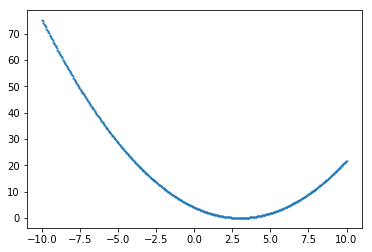

In [22]:
plt.scatter(X, Y, s=1)
plt.show()


 ## Observations:
 
 1. For this data, ___Pearson correlation coefficient___ might ___not___ give the best results, because the data is ___not linear___.
 
 
 2. But we can easily rank the data, cause there is a ___unique value__ for ___each x___. That ___eliminates___ the ___need of data transformation___, to apply ___Spearman corelation coefficient___.

## Conclusion:


In [20]:
# Spearman rank-order correlation coefficient for this data is..
import scipy.stats as stats
result = stats.spearmanr(X,Y)

In [21]:
print('Spearman rank-order correlation coefficient of X and Y is {}. '.format(result.correlation))

Spearman rank-order correlation coefficient of X and Y is -0.6555314221256885. 
